In [74]:
## importing libraries ##


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
## loading dataset ##
df = pd.read_csv('/content/LOAN DATA.csv')
print(df)
df.head()


      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [76]:
## extracting information about the dataset##


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [77]:
## Description of the data##
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [78]:
## Comparing two variables to see how the target variable is affected by different factors##

pd.crosstab(df['Credit_History'], df['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


From the above computations, it is quite clear that, a person qith credit history 1 is more eligible to be approved of loan than the one with credit history 0.

number of people who take loan as group by Credit history:
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64


<ipython-input-79-0ad324f4fa87>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_History',data=df,palette='Set1')


<Axes: xlabel='Credit_History', ylabel='count'>

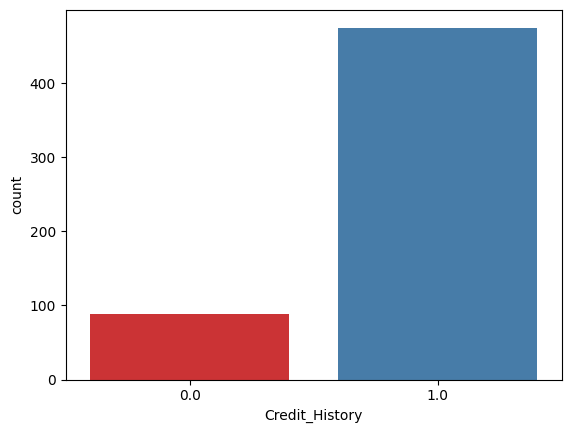

In [79]:
print("number of people who take loan as group by Credit history:")
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History',data=df,palette='Set1')

In [30]:
pd.crosstab(df['Loan_Status'], df['Married'], margins=True)

Married,No,Yes,All
Loan_Status,,,
N,79,113,192
Y,134,285,419
All,213,398,611


From the above computations, it is quite clear that, a person who is married is more eligible to be approved of loan.

number of people who take loan as group by marital status:
Married
Yes    398
No     213
Name: count, dtype: int64


<ipython-input-81-6eab56bfdae7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Married',data=df,palette='Set1')


<Axes: xlabel='Married', ylabel='count'>

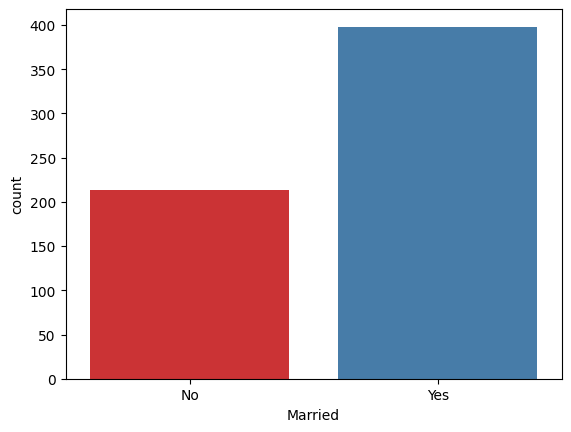

In [81]:
print("number of people who take loan as group by marital status:")
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df,palette='Set1')

In [31]:
pd.crosstab(df['Loan_Status'], df['Dependents'], margins=True)

Dependents,0,1,2,3+,All
Loan_Status,,,,,
N,107,36,25,18,186
Y,238,66,76,33,413
All,345,102,101,51,599


In this computation, the person having 0 dependents is more likely to be approved and the number of approvals sharply fall as the number of depenents increase.

number of people who take loan as group by dependents:
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


<ipython-input-80-75e589d5de6e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dependents',data=df,palette='Set1')


<Axes: xlabel='Dependents', ylabel='count'>

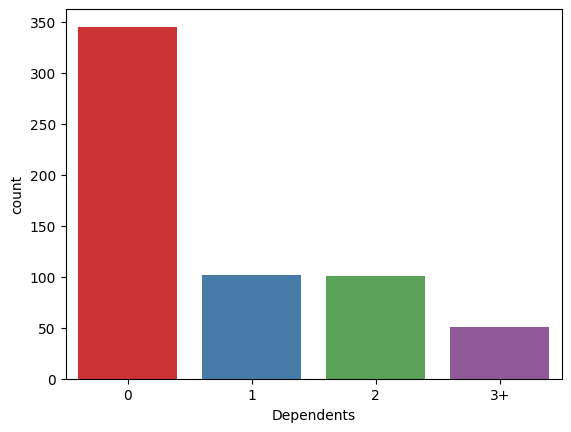

In [80]:
print("number of people who take loan as group by dependents:")
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents',data=df,palette='Set1')

In [82]:
pd.crosstab(df['Loan_Status'], df['LoanAmount'], margins=True)

LoanAmount,9.0,17.0,25.0,26.0,30.0,35.0,36.0,40.0,42.0,44.0,...,480.0,490.0,495.0,496.0,500.0,570.0,600.0,650.0,700.0,All
Loan_Status,,,,,,,,,,,,,,,,,,,,,
N,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,1,0,0,0,181
Y,0,1,2,1,2,0,1,2,1,2,...,2,1,0,1,0,0,2,1,1,411
All,1,1,2,1,2,1,1,2,1,2,...,3,1,1,1,1,1,2,1,1,592


number of people who take loan as group by loanamount:
LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64


<ipython-input-83-3a8c06f53a6b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LoanAmount',data=df,palette='Set1')


<Axes: xlabel='LoanAmount', ylabel='count'>

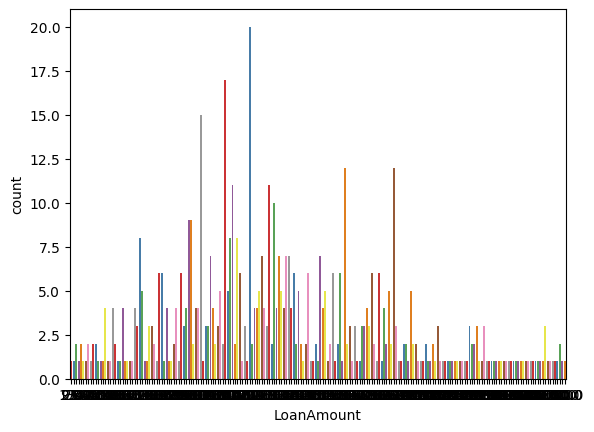

In [83]:
print("number of people who take loan as group by loanamount:")
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount',data=df,palette='Set1')

<Axes: >

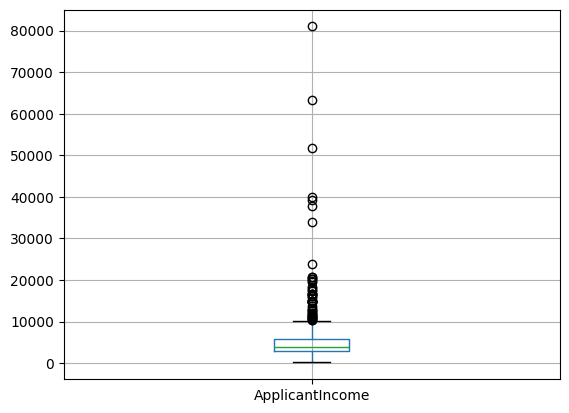

In [33]:
# Data Visualisation #

df.boxplot(column="ApplicantIncome")

Clearly, there are a lot many numbers of outliers in the data, and this problem of outliers has to be fixed before further compuatational procedure.

<Axes: >

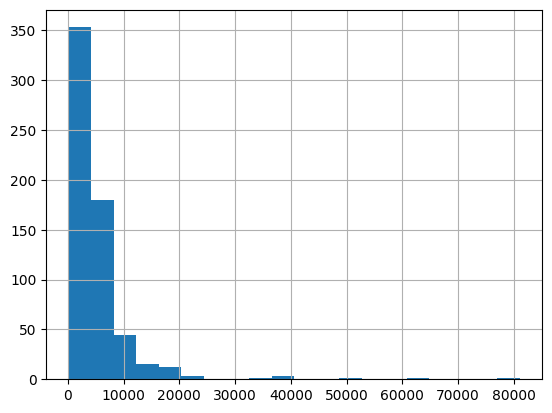

In [34]:
df['ApplicantIncome'].hist(bins=20)

The histogram for applicant income is right skewed , so we need to normalize the data.

<Axes: >

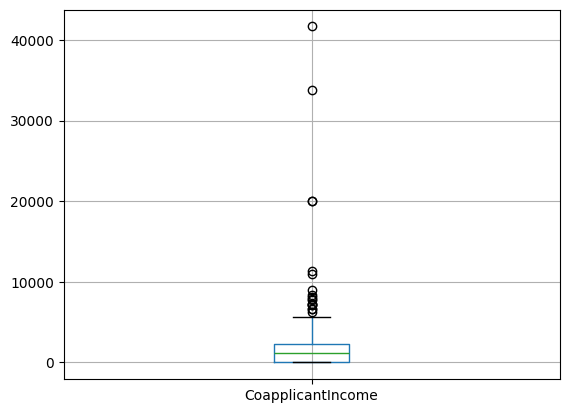

In [14]:
df.boxplot(column="CoapplicantIncome")

Clearly, even in case of Coapplicant income there are a lot many numbers of outliers in the data, and this problem of outliers has to be fixed before further compuatational procedure.

<Axes: >

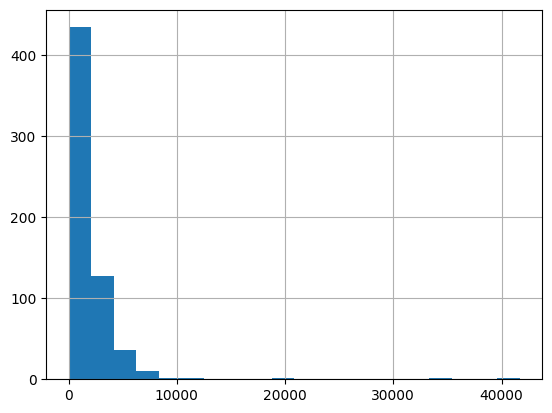

In [35]:
df['CoapplicantIncome'].hist(bins=20)

The histogram for Coapplicant income is right skewed , so we need to normalize the data.

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

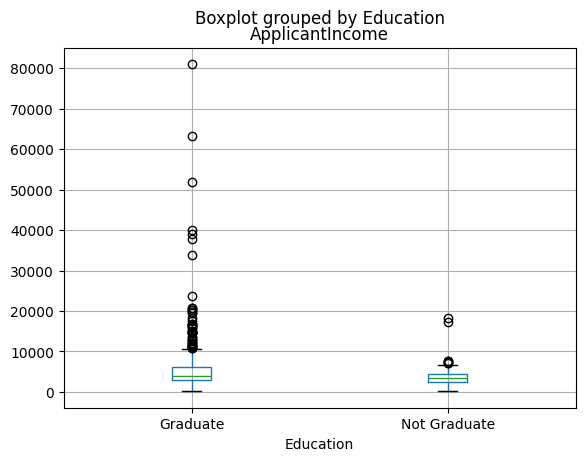

In [36]:
df.boxplot(column='ApplicantIncome', by="Education")

Although the mean salary does not differ significantly between graduates and non-graduates. But it is evident that , some graduates earn much higher salaries than non-graduates.

<Axes: title={'center': 'CoapplicantIncome'}, xlabel='Education'>

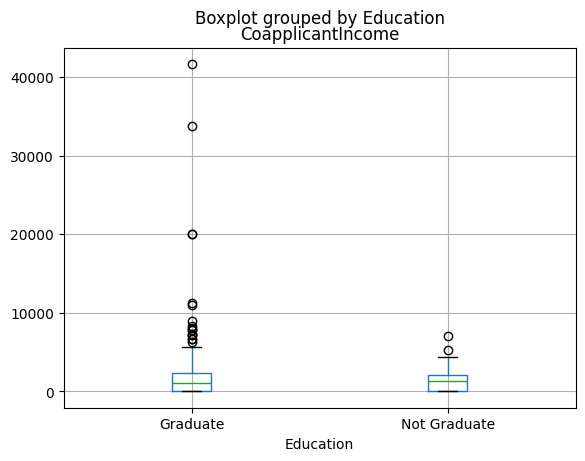

In [37]:
df.boxplot(column='CoapplicantIncome', by="Education")

The bank considers the income of both applicants, which can increase the chances of loan approval.
Even here, the mean salary does not differ significantly between graduates and non-graduates. But it is evident that , some graduates earn much higher salaries than non-graduates.

<Axes: title={'center': 'LoanAmount'}, xlabel='Education'>

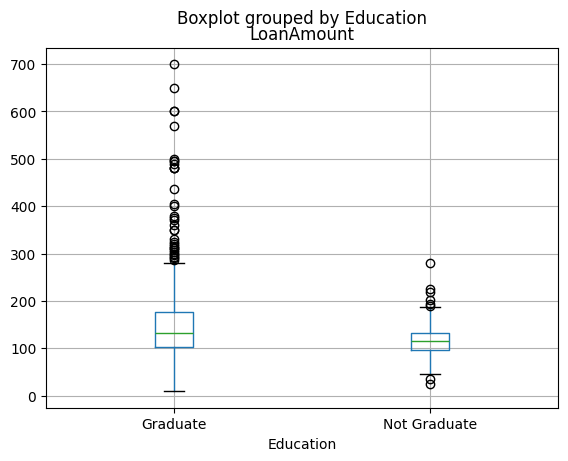

In [38]:
df.boxplot(column='LoanAmount', by="Education")

It is quite definite that the graduates are offered better loan amount than the non graduates, as the outliers may indicate.

<Axes: >

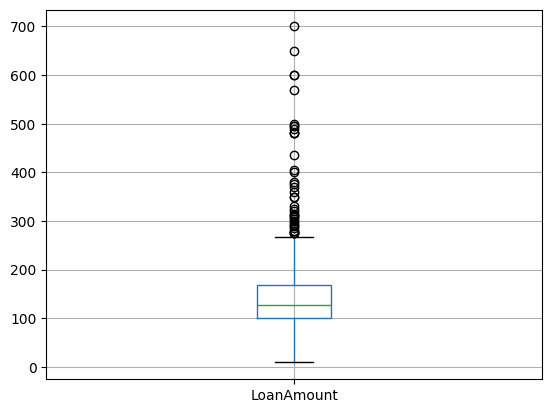

In [39]:
df.boxplot(column='LoanAmount')

<Axes: >

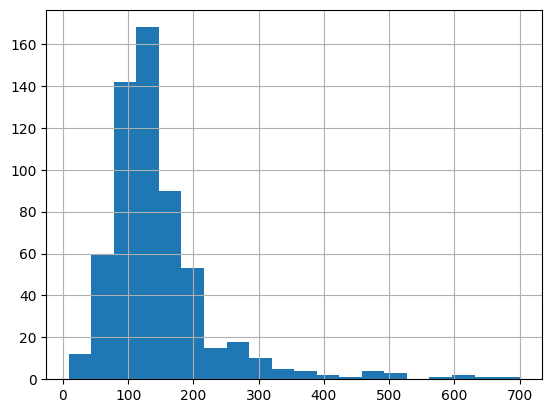

In [40]:
df['LoanAmount'].hist(bins=20)

It appears that the loan amount is also is a bit right skewed , which definitely needs to be fixed.

# NORMALIZATION:
 From the above, it is quite clear that, almost all the variables rae skewed, it is required to normalize each of them.

<Axes: >

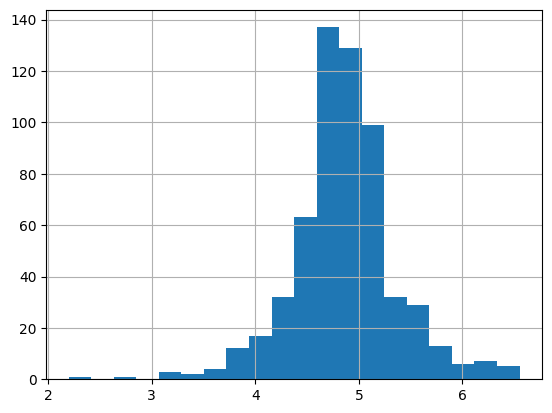

In [41]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

USing .log, the data appears to be much more normalized than before.

# DATA CLEANING:
It is required to remove the null value and cleanse the data to obtain optimal results.

In [42]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [43]:
## It is required to fill the above null values using means and modes.
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.LoanAmount_log = df.LoanAmount_log.fillna(df.LoanAmount_log.mean())
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df.isnull().sum()

<ipython-input-43-2d566d73517d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
<ipython-input-43-2d566d73517d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


The data has been cleansed and there are no such null values.

<Axes: >

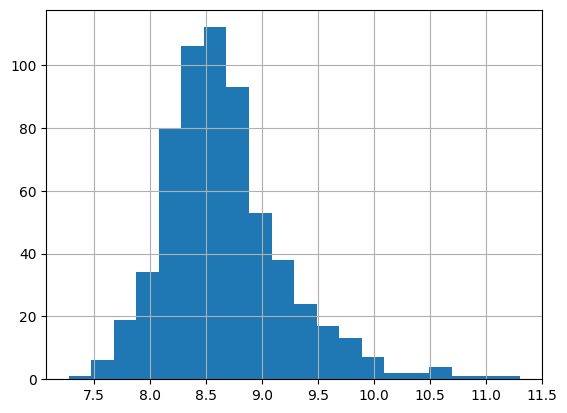

In [44]:
## Data adaption and normalization##
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

Hence, the dataset has been completely normalized

# SUPERVISED MACHINE LEARNING IMPLEMENTATION##
As it has been mentioned, Loan_Status is our target variable.

In [45]:
X = df.iloc[:, np.r_[1:5, 9:11, 13:15]].values # Features
y = df.iloc[:, 12].values # Target Variable

In [46]:
X

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [47]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [49]:
# Training and Testing Data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
X_train

array([['Male', 'Yes', '0', ..., 1.0, 4.875197323201151, 5858.0],
       ['Male', 'No', '1', ..., 1.0, 5.278114659230517, 11250.0],
       ['Male', 'Yes', '0', ..., 0.0, 5.003946305945459, 5681.0],
       ...,
       ['Male', 'Yes', '3+', ..., 1.0, 5.298317366548036, 8334.0],
       ['Male', 'Yes', '0', ..., 1.0, 5.075173815233827, 6033.0],
       ['Female', 'Yes', '0', ..., 1.0, 5.204006687076795, 6486.0]],
      dtype=object)

The output is not satisfying as, there are some categorical variables. To get rid of them, it is required to convert them to  or 1

In [51]:
## to convert categorical values to numeric using LebalEncoder for X_train and X_test

from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()
for i in range(0, 5):
     X_train[:, i] = labelencoder_X.fit_transform(X_train[:, i])
X_train[:, 7] = labelencoder_X.fit_transform(X_train[:, 7])
X_train


array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [52]:
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [53]:
# Converting in for loop

for i in range(0, 5):
     X_test[:, i] = labelencoder_X.fit_transform(X_test[:, i])


X_test[:, 7] = labelencoder_X.fit_transform(X_test[:, 7])

# Converting all the categorical values to numeric using LabelEncoder for y_test

labelencoder_y = LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test)
# Printing X_test

X_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

In [54]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [55]:
# Scaling the data

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

As we have different types of data in dataframe, they have been scaled for better prediction.

# Method 1: Decision Tree Classifier

In [56]:
# Performing Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

DTClassifier = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
DTClassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [57]:
y_pred = DTClassifier.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [58]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_pred, y_test))

Accuracy: 0.7073170731707317


As it can be observed, the output is only 58% , ot is not much good for prediction.

#Method 2: KNeighbours

In [59]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf=KNeighborsClassifier()
kn_clf.fit(X_train, y_train)
y_pred=kn_clf.predict(X_test)
print("acc of KN is", metrics.accuracy_score(y_pred, y_test))
y_pred

acc of KN is 0.7967479674796748


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

As it can be observed, the accuracy is only 65% , it is not much good for prediction.

# Method 3: Naive Bayes

In [60]:
# Performing Naive Bayes

from sklearn.naive_bayes import GaussianNB

NBClassifier = GaussianNB()
NBClassifier.fit(X_train, y_train)

GaussianNB()

In [61]:
# Predicting output

y_pred = NBClassifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [62]:
# Printing output in Accuracy

print("Accuracy", metrics.accuracy_score(y_pred,y_test))

Accuracy 0.8292682926829268


The accuracy for NaiveBayes is almost 83%, which appears to be the best amongst the three. So, It is admissible to use Naive Bayes.

In [63]:
test_data = pd.read_csv('/content/test_data.csv')
print(test_data)
test_data.head()

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


This is the same data set but without the target variable which is Loan_Status. The main goal is to predict whether a loan should be approved or not.

In [64]:
test_data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [65]:
# Filling NAs with modes

test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace=True)
test_data['Married'].fillna(test_data['Married'].mode()[0], inplace=True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0], inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0], inplace=True)

# Filling NA with mean
test_data.LoanAmount = test_data.LoanAmount.fillna(test_data.LoanAmount.mean())

# Checking NAs values
test_data.isnull().sum()


<ipython-input-65-1c8ae058768b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace=True)
<ipython-input-65-1c8ae058768b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


<Axes: >

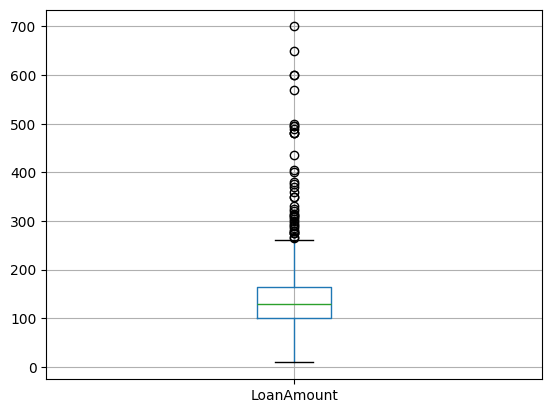

In [13]:
# Visualisations

test_data.boxplot(column = "LoanAmount")

<Axes: >

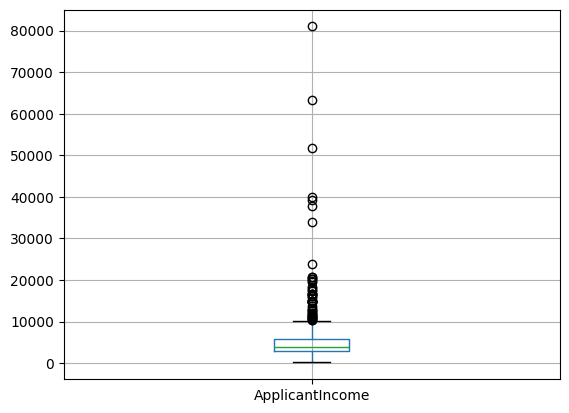

In [14]:
# Visualtions

test_data.boxplot(column = "ApplicantIncome")

<Axes: >

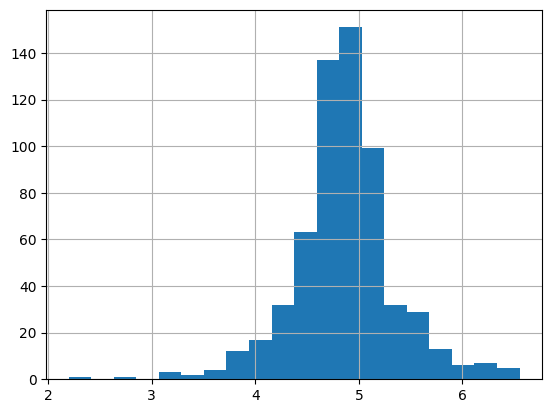

In [17]:
# Normalizing 'LoanAmount_log'
test_data['LoanAmount_log'] = np.log(test_data['LoanAmount'])
test_data['LoanAmount_log'].hist(bins=20)



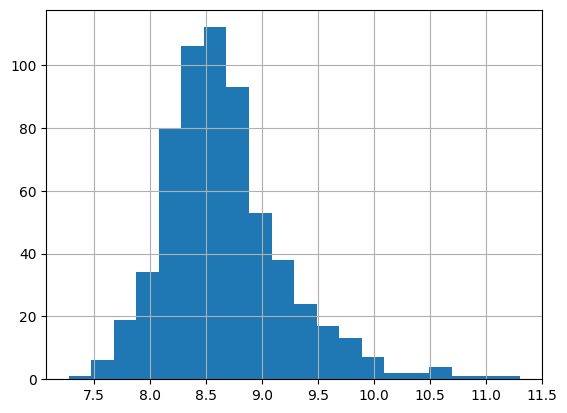

In [18]:
test_data['TotalIncome'] = test_data['ApplicantIncome'] + test_data['CoapplicantIncome']
test_data['Totalncome_log'] = np.log(test_data['TotalIncome'])
test_data['Totalncome_log'].hist(bins=20)

In [19]:
# Defining all the features
test = test_data.iloc[:, np.r_[1:5, 9:11, 13:15]].values
test

array([['Male', 'No', '0', ..., 1.0, 5849.0, 8.674025985443025],
       ['Male', 'Yes', '1', ..., 1.0, 6091.0, 8.714567550836485],
       ['Male', 'Yes', '0', ..., 1.0, 3000.0, 8.006367567650246],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 8312.0, 9.025455532779063],
       ['Male', 'Yes', '2', ..., 1.0, 7583.0, 8.933664178700935],
       ['Female', 'No', '0', ..., 0.0, 4583.0, 8.430109084509125]],
      dtype=object)

In [66]:
# Convert it with for loop

for i in range(0, 5):
     test[:, i] = labelencoder_X.fit_transform(test[:, i])
test

array([[1, 0, 0, ..., 1.0, 5849.0, 8.674025985443025],
       [1, 1, 1, ..., 1.0, 6091.0, 8.714567550836485],
       [1, 1, 0, ..., 1.0, 3000.0, 8.006367567650246],
       ...,
       [1, 1, 1, ..., 1.0, 8312.0, 9.025455532779063],
       [1, 1, 2, ..., 1.0, 7583.0, 8.933664178700935],
       [0, 0, 0, ..., 0.0, 4583.0, 8.430109084509125]], dtype=object)

In [68]:
test[:,7]=labelencoder_X.fit_transform(test[:, 7])
test

array([[1, 0, 0, ..., 1.0, 5849.0, 320],
       [1, 1, 1, ..., 1.0, 6091.0, 333],
       [1, 1, 0, ..., 1.0, 3000.0, 42],
       ...,
       [1, 1, 1, ..., 1.0, 8312.0, 436],
       [1, 1, 2, ..., 1.0, 7583.0, 416],
       [0, 0, 0, ..., 0.0, 4583.0, 185]], dtype=object)

In [71]:
# Predicting using Naive Bayes

pred = NBClassifier.predict(test)
# Printing pred

pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

The loan_id s showing 1 are the ones which are eligible for loan
and loan_id s showing 0 are the ones which are ineligible for loan.

In [72]:
result_df = pd.DataFrame({'Loan_ID': df['Loan_ID'], 'Prediction': pred})
print(result_df)

      Loan_ID  Prediction
0    LP001002           1
1    LP001003           1
2    LP001005           1
3    LP001006           1
4    LP001008           1
..        ...         ...
609  LP002978           1
610  LP002979           1
611  LP002983           1
612  LP002984           1
613  LP002990           0

[614 rows x 2 columns]


The above chart clearly specifies the loan Id s eligible for loan approval;
for eg., the loan_ID LP001002 shows prediction 1 which implies, the loan_ID is eligible for approval,
On the contrary, LP002990 happens to be the Loan_ID which inwligible for loan approval.

In [73]:
filename = 'New Organized Data'
result_df.to_csv(filename, index=False)
print(f'Data exported to {filename} successfully.')

Data exported to New Organized Data successfully.


Report:
After analyzing the data, it could be concluded that achieving an accuracy of almost 83% happens to be quite satisfying for predicting whether an applicant's application should be approved or not. However, there are scopes for improvement, and accuracy could be  further enhanced through manipulations or alternative methods such as regression or random forest. Although the computed accuracy is satisfactory, it is advisable to consider additional factors for a more comprehensive evaluation.

It is recommended, that the bank manager might utilize the 'New Organized Data' CSV file for verification. In this file, **a value of 0 indicates that the candidate is not suitable for approval, whereas a value of 1 suggests they are eligible.** Inspite of the fact that current accuracy is at 83%, it's reasonable for the bank manager to exercise caution and conduct a thorough check of the applicant's history and background before finalizing any approval decisions.